# ACP

Est ce qu'une ACP peut nous aider à comparer les volatilités implicites et les volatilités issues du modèle ?

<strong>Résumé des résultats :</strong>
- Les données brutes probablement en définissant des zones de l'espace dans le plan factoriel des deux premières composantes principales.
- Ca a l'air moins évident pour les variations relatives (IV normales) et les variations absolues...

<strong>NB : </strong>Le script est rédigé en R.

In [1]:
rm(list=ls())

# Données brutes

On remarque plusieurs choses :
- Les deux premières composantes principales expliquent 98% du modèle.
- Chaque année forme un "tas" bien localisé dans le plan factoriel des deux premières composantes principales. Les données sont relativement bien tassées jusqu'à 2014, puis les données de 2015 et 2016 sortent de cette zone pour occuper les valeurs très négatives de la première composante principale avec en plus une grande dispersion selon la deuxième composante principale, ce que l'on avait pas pour les données jusuq'à 2014.
- Très forte corrélation entre les différents types de swaptions comme le montre le cercle de corrélations.
- E1T5 se trouve hors des autres swaptions sur le cercle de corrélation.

In [2]:
ATM = read.table("Databases/swaphist.csv", sep= ";", header=TRUE, stringsAsFactors=F)
ATM$Date <- as.Date( ATM$Date, '%d/%m/%Y') #Remise au format américan YYYY-MM-DD
#str(ATM)

In [3]:
acp = princomp(ATM[,2:10], cor = TRUE, scores = TRUE)
summary(acp)

valp = acp$sdev^2 
#plot(valp, type="b")

Importance of components:
                          Comp.1     Comp.2     Comp.3      Comp.4      Comp.5
Standard deviation     2.9373609 0.46531837 0.30280060 0.202847884 0.125056415
Proportion of Variance 0.9586766 0.02405791 0.01018758 0.004571918 0.001737679
Cumulative Proportion  0.9586766 0.98273447 0.99292205 0.997493967 0.999231646
                             Comp.6       Comp.7       Comp.8       Comp.9
Standard deviation     0.0639010340 0.0390779961 2.795710e-02 2.287265e-02
Proportion of Variance 0.0004537047 0.0001696766 8.684441e-05 5.812867e-05
Cumulative Proportion  0.9996853503 0.9998550269 9.999419e-01 1.000000e+00

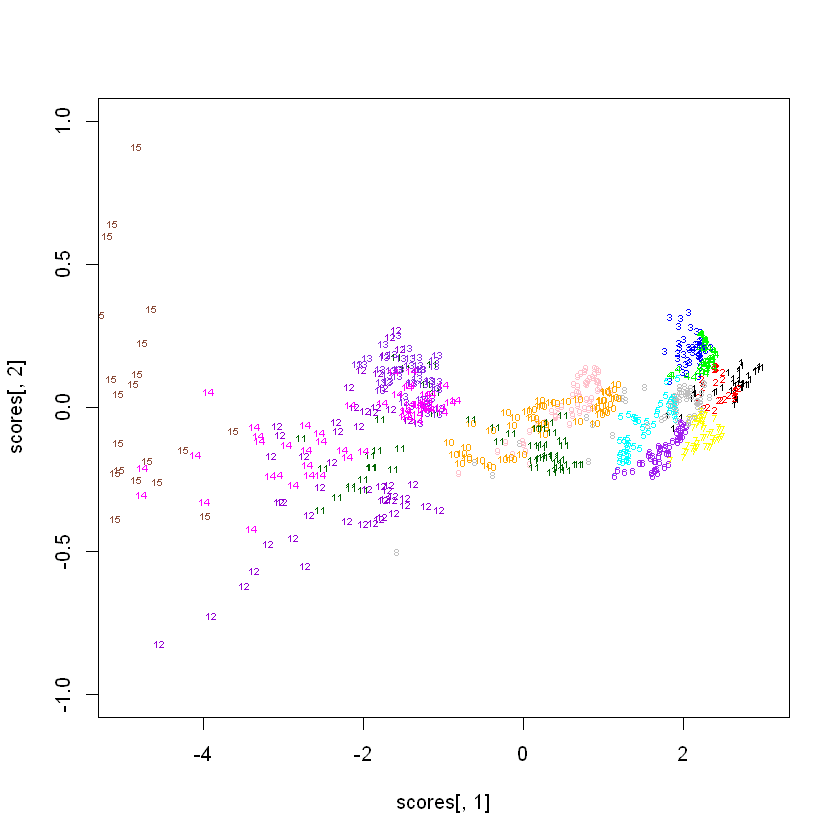

In [4]:
scores = acp$scores
#print(scores)
plot(scores[,1],scores[,2], type = "n", xlim = c(-5,3), ylim=c(-1,1))
n = nrow(ATM)
couleurs = c("black", "red", "blue", "green", "cyan", "purple", "yellow", "gray", "pink", "orange", "darkgreen", 
             "darkviolet", "blueviolet", "magenta", "salmon4", "turquoise")
for (i in 1:n){
    color = as.integer(format(ATM$Date[i], "%Y")) - 2000
    text(scores[i,1],scores[i,2],labels=color,cex=0.5,col=couleurs[color])
}

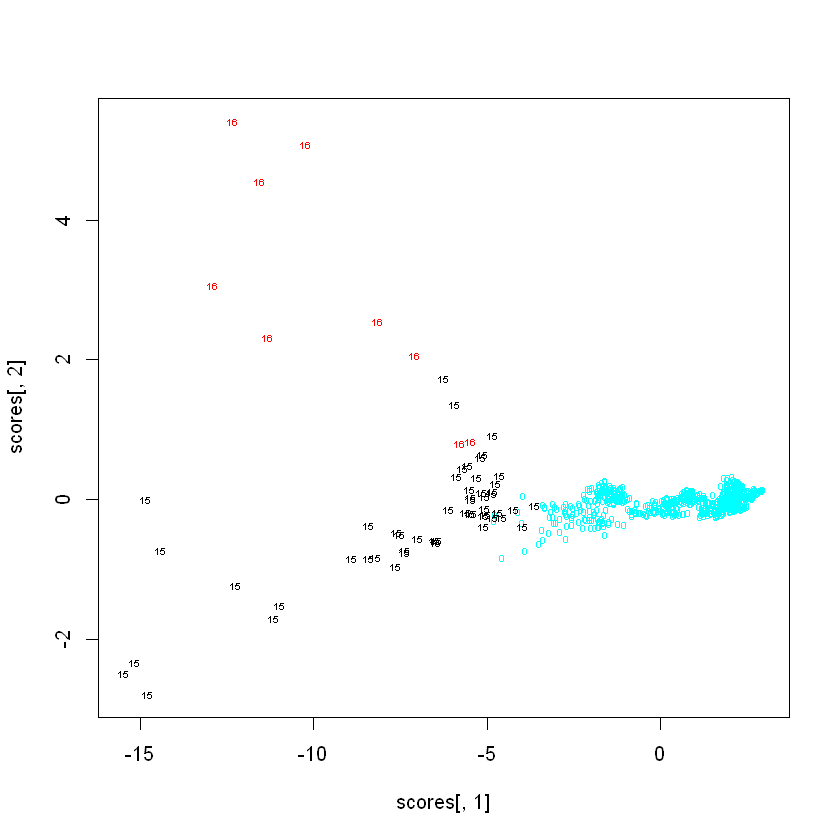

In [5]:
plot(scores[,1],scores[,2], type = "n")
n = nrow(ATM)
couleurs = c("black", "red", "blue", "green", "cyan", "purple", "yellow", "gray", "pink", "orange", "darkgreen", 
             "darkviolet", "blueviolet", "magenta", "salmon4", "turquoise")
for (i in 1:n){
    if (format(ATM$Date[i], "%Y") == (2015)){
        text(scores[i,1],scores[i,2],labels=15,cex=0.5,col=couleurs[1])
    }
    else if (format(ATM$Date[i], "%Y") == (2016)){
        text(scores[i,1],scores[i,2],labels=16,cex=0.5,col=couleurs[2])
    }
    else{
        text(scores[i,1],scores[i,2],labels=0,cex=0.5,col=couleurs[5])
    }
}

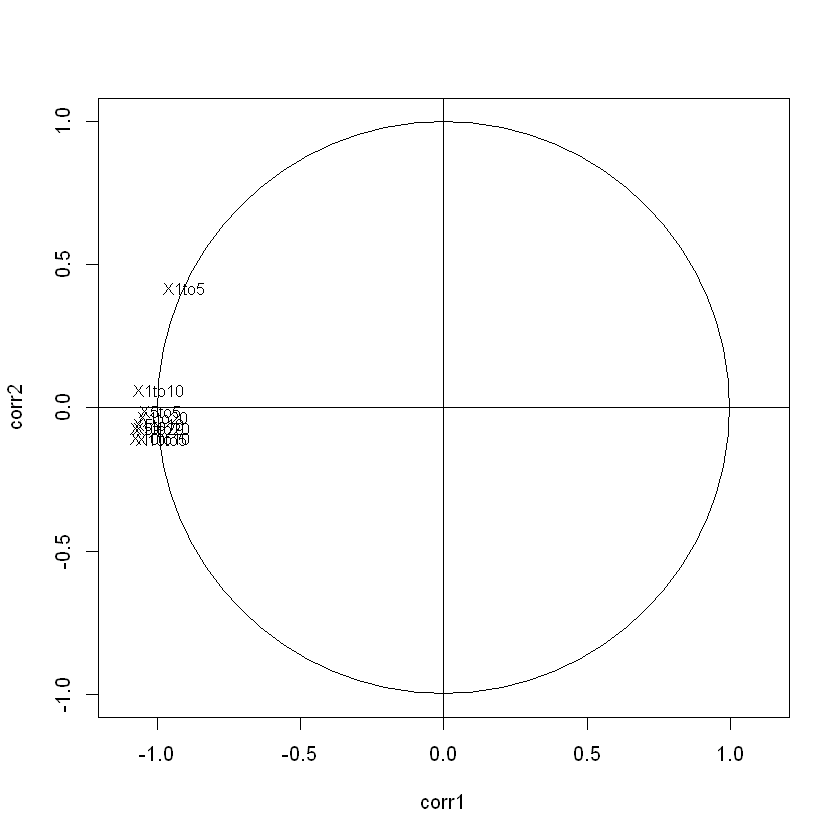

In [6]:
#On peut afficher le matrice de passage vers la base des composantes principales
loadings = acp$loadings
#print(loadings)

#Cercle des corrélations
corr1 = loadings[,1]*sqrt(valp[1])
corr2 = loadings[,2]*sqrt(valp[2])
plot(corr1, corr2, xlim=c(-1,1), ylim=c(-1,1), asp=1, type="n")
text(corr1, corr2, labels=colnames(ATM[,2:10]), cex=0.8)
symbols(0,0,circles=1, inches=FALSE, add=TRUE)
abline(h=0,v=0)
symbols(0,0,circles=1,inches=F,add=T)

# Variations absolues

- L'ACP semble moins robuste. Les deux premières composantes n'expliquent "que" 84% du modèle. Il faut monter à 5 composantes principales pour avoir autant de modèle expliqué comme précedemment.
- La dispersion évoqué précedemment dans le plan factoriel en fonction de l'année ne se retroube plus ici. 
- En revanche, on observe une concentration autour de 0 selon la deuxième composante principale et un tassement général des données.
- E1T5 ne se trouve pas sur le cercle de corrélation contraireemnt à tous les autres swaptions.
- Uniquement des 15 et 16 divergent du "tas central" dans le plan factoriel.

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.3431424 1.4690270 0.92435687 0.45957875 0.43933920
Proportion of Variance 0.6100352 0.2397823 0.09493729 0.02346807 0.02144655
Cumulative Proportion  0.6100352 0.8498174 0.94475473 0.96822280 0.98966935
                           Comp.6      Comp.7     Comp.8       Comp.9
Standard deviation     0.24729228 0.123132682 0.10014115 0.0814400720
Proportion of Variance 0.00679483 0.001684629 0.00111425 0.0007369428
Cumulative Proportion  0.99646418 0.998148807 0.99926306 1.0000000000

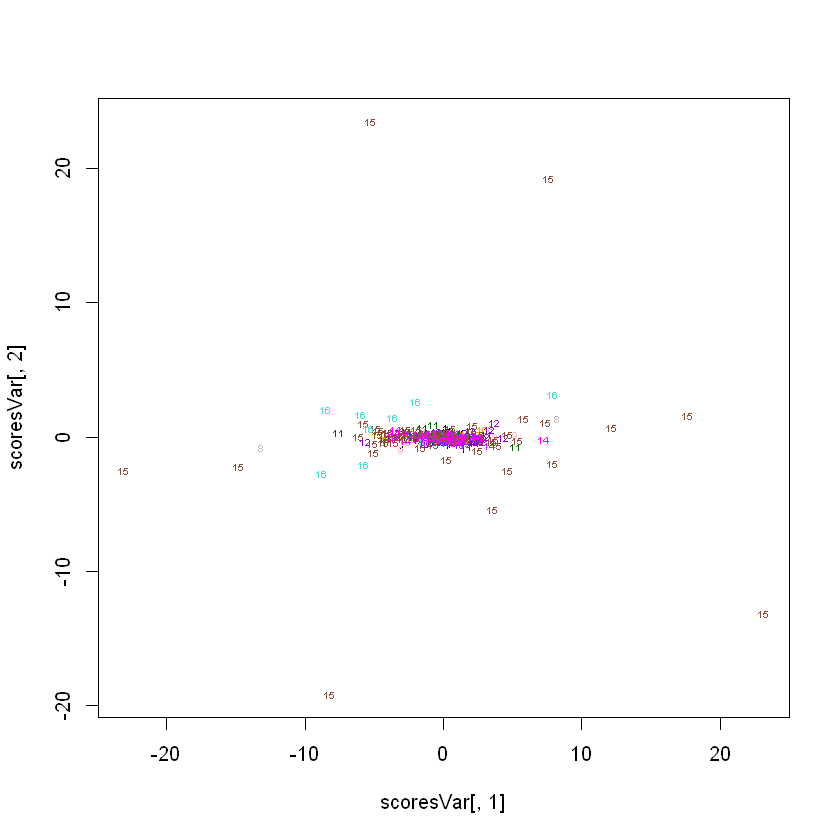

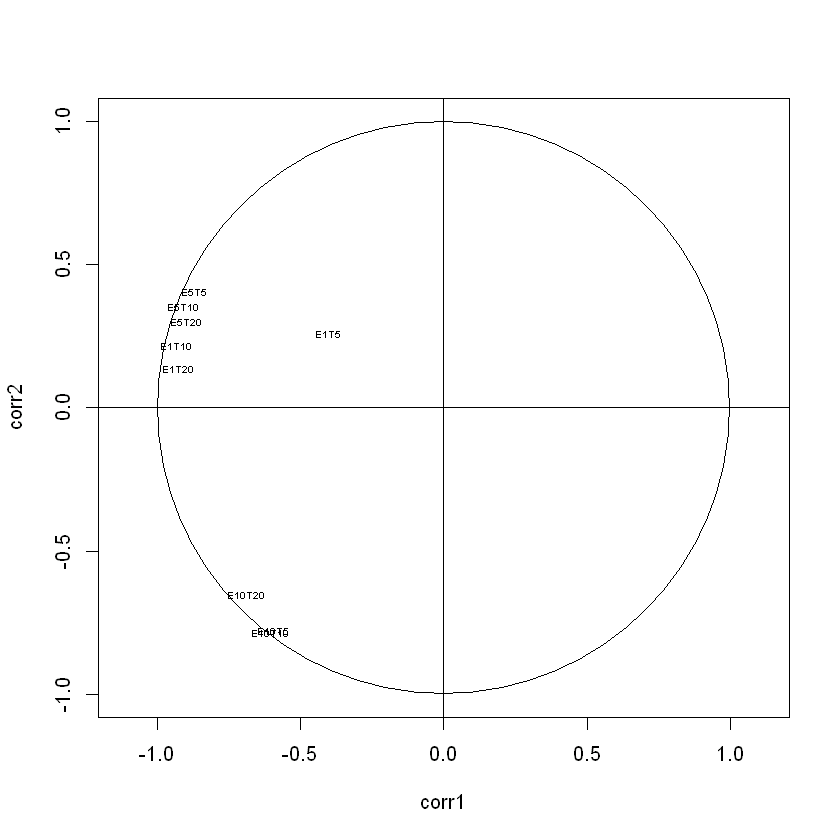

In [7]:
#Chargement des données
var = read.table("Databases/Incr.csv", sep= ";", header=TRUE, stringsAsFactors=F)
var$Date <- as.Date( var$Date, '%d/%m/%Y') #Remise au format américan YYYY-MM-DD
#str(var)

#ACP
acpVar = princomp(var[,2:10], cor = TRUE, scores = TRUE)
summary(acpVar)

#Valeurs propres
valpVar = acpVar$sdev^2 
#plot(valpVar, type="b")

#Représentation dans le plan factoriel
scoresVar = acpVar$scores
#print(scoresVar)
plot(scoresVar[,1],scoresVar[,2], type = "n")
n = nrow(var)
couleurs = c("black", "red", "blue", "green", "cyan", "purple", "yellow", "gray", "pink", "orange", "darkgreen", 
             "darkviolet", "blueviolet", "magenta", "salmon4", "turquoise")
for (i in 1:n){
    color = as.integer(format(var$Date[i], "%Y")) - 2000
    text(scoresVar[i,1],scoresVar[i,2],labels=color,cex=0.5,col=couleurs[color])
}

#On peut afficher le matrice de passage vers la base des composantes principales
loadingsVar = acpVar$loadings
#print(loadingsVar)

#Cercle des corrélations
corr1 = loadingsVar[,1]*sqrt(valpVar[1])
corr2 = loadingsVar[,2]*sqrt(valpVar[2])
plot(corr1, corr2, xlim=c(-1,1), ylim=c(-1,1), asp=1, type="n")
text(corr1, corr2, labels=colnames(var[,2:10]), cex=0.5)
symbols(0,0,circles=1, inches=FALSE, add=TRUE)
abline(h=0,v=0)
symbols(0,0,circles=1,inches=F,add=T)

# Variations Relatives

- Deux premières composantes expliquent 88% du modèle.
- On observe toujours un "tas" global mais pas de segmentation apparente entre les années comme pour les données brutes.
- En revanche, sur le cercle des corrélations, les swaptions de même maturité sont regroupés dans les mêmes zones.

Importance of components:
                          Comp.1     Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     2.6653097 0.94474440 0.66543590 0.50231304 0.36641604
Proportion of Variance 0.7893195 0.09917133 0.04920055 0.02803538 0.01491786
Cumulative Proportion  0.7893195 0.88849087 0.93769142 0.96572679 0.98064465
                           Comp.6      Comp.7      Comp.8      Comp.9
Standard deviation     0.24676290 0.223962734 0.201884601 0.149631231
Proportion of Variance 0.00676577 0.005573256 0.004528599 0.002487723
Cumulative Proportion  0.98741042 0.992983678 0.997512277 1.000000000

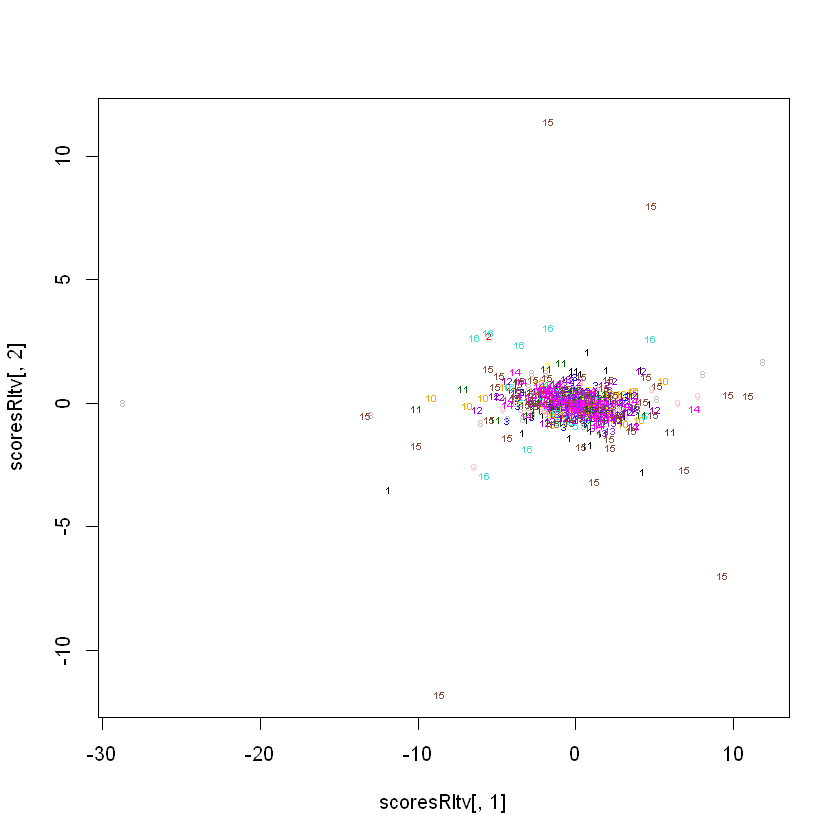

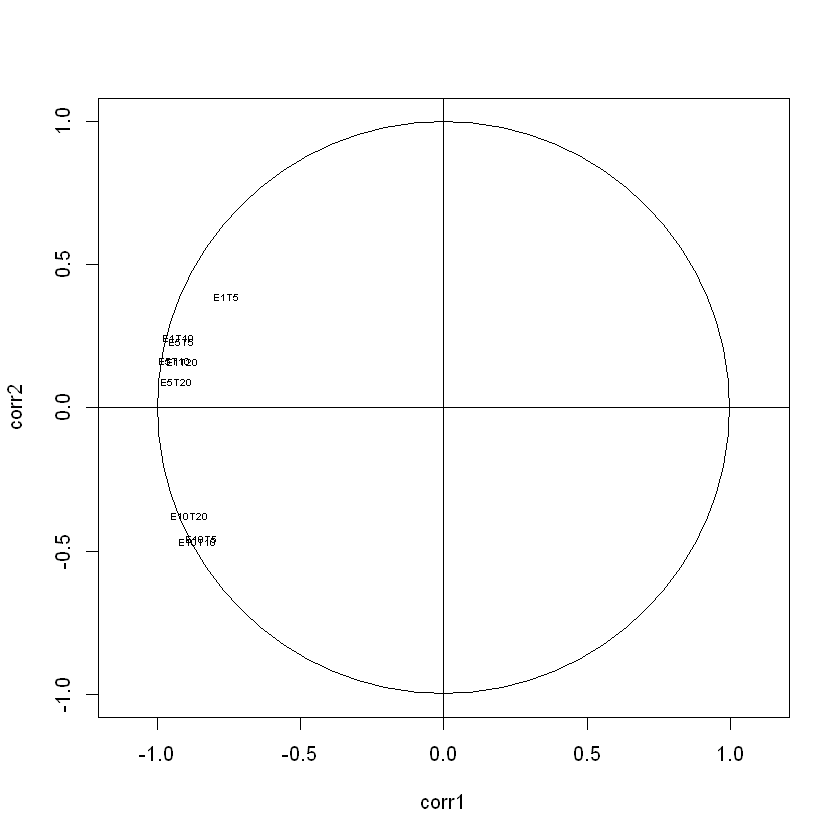

In [8]:
#Chargement des données
varRltv = read.table("Databases/var_relatives.csv", sep= ";", header=TRUE, stringsAsFactors=F)
varRltv$Date <- as.Date( varRltv$Date, '%d/%m/%Y') #Remise au format américan YYYY-MM-DD
#str(varRltv)

#ACP
acpRltv = princomp(varRltv[,2:10], cor = TRUE, scores = TRUE)
summary(acpRltv)

#Valeurs propres
valpRltv = acpRltv$sdev^2 
#plot(valpRltv, type="b")

#Représentation dans le plan factoriel
scoresRltv = acpRltv$scores
#print(scoresRltv)
plot(scoresRltv[,1],scoresRltv[,2], type = "n")
n = nrow(varRltv)
couleurs = c("black", "red", "blue", "green", "cyan", "purple", "yellow", "gray", "pink", "orange", "darkgreen", 
             "darkviolet", "blueviolet", "magenta", "salmon4", "turquoise")
for (i in 1:n){
    color = as.integer(format(varRltv$Date[i], "%Y")) - 2000
    text(scoresRltv[i,1],scoresRltv[i,2],labels=color,cex=0.5,col=couleurs[color])
}

#On peut afficher le matrice de passage vers la base des composantes principales
loadingsRltv = acpRltv$loadings
#print(loadingsRltv)

#Cercle des corrélations
corr1 = loadingsRltv[,1]*sqrt(valpRltv[1])
corr2 = loadingsRltv[,2]*sqrt(valpRltv[2])
plot(corr1, corr2, xlim=c(-1,1), ylim=c(-1,1), asp=1, type="n")
text(corr1, corr2, labels=colnames(varRltv[,2:10]), cex=0.5)
symbols(0,0,circles=1, inches=FALSE, add=TRUE)
abline(h=0,v=0)
symbols(0,0,circles=1,inches=F,add=T)